<a href="https://colab.research.google.com/github/asra020601/ds_salaries/blob/main/ds_salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Over the years, there has been a significant upward trend in salaries for data science. This is due to several factors, including the increasing demand for skilled professionals in these fields, the rapid growth of technology and data-driven industries, and the scarcity of talent with the necessary skills and expertise. However, it's important to note that salaries can vary significantly depending on factors such as location, industry, company size, and individual experience and skills.In this project I discuss the trends and patterns in data science salaries over the years. This dataset was downloaded from kaggle.com.

Data Science Job Salaries Dataset contains 11 columns, each are: 
work_year,  experience_level, employment_type,  job_title, salary, salary_currency, salaryinusd, employee_residence, remote_ratio, company_location, company_size.

# **BASIC UNDERSTANDING**

Importing important libraries.

In [ ]:
import pandas as pd #importing all the import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

Reading the dataset using pandas.

In [ ]:
df = pd.read_csv('/content/ds_salaries.csv') #loading the data

Gathering some fundamental information about the dataset.





In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [ ]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [ ]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [ ]:
df.head()

Checking for any defects/errors in the dataset.

In [ ]:
df.nunique() #checking the unique values

In [ ]:
df.isnull().sum() #checking for null values

In [ ]:
df['work_year'].unique()

# **VISUALIZATION**

Salary in US Dollar is mostly normally distributed although a tiny bit of right skew can be observed. A peak can be observed around 137570 which is also the mean/median salary.

In [ ]:
print(df['salary_in_usd'].mean())

137570.38988015978


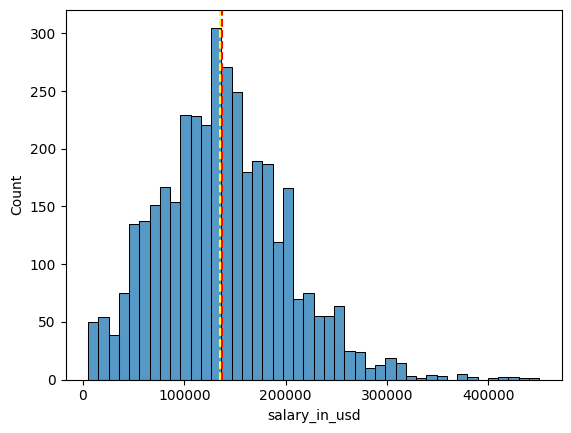

In [ ]:
sns.histplot(df['salary_in_usd'])
plt.axvline(x=df['salary_in_usd'].mean(),
            color='red', linestyle= '--')
plt.axvline(x=df['salary_in_usd'].median(),
            color='yellow', linestyle = '--')

Below chart shows that salary has some outliers. I have decided to not delete these outliers because these represent interesting phenomena that are worth exploring further, removing them can distort the distribution and skew the results and removing outliers can introduce bias into the analysis and compromise the validity of the results.

<Axes: >

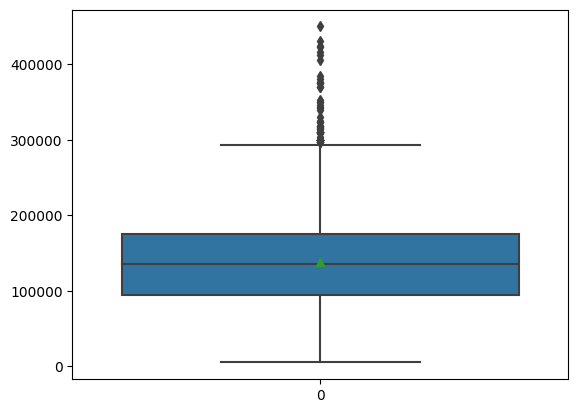

In [ ]:
sns.boxplot(df['salary_in_usd'],showmeans=True)

This shows that some executives (outliers) were paid unnaturally high in the year 2020. The entry level employees are paid the least in comparison with others but a steady growth can be every year in entry level salaries. The upward trend in the senior, mid level and entry is almost identical.


<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

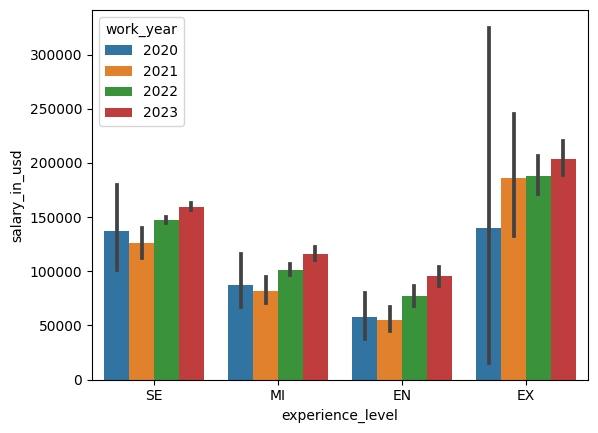

In [ ]:
sns.barplot(x = df['experience_level'], y = df['salary_in_usd'], hue = df['work_year'])

Below plot tells us that full time employess are paid the most in large, small and medium companies while part time employees and freelancers are paid less than than full time employees and contracters. Contracters in large companies are paid significantly more than in small amd medium companies.




<Axes: xlabel='employment_type', ylabel='salary_in_usd'>

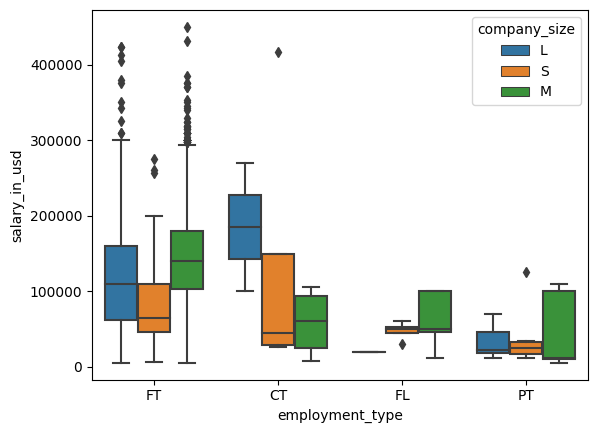

In [ ]:
sns.boxplot(x = df['employment_type'], y = df['salary_in_usd'],hue = df['company_size'] )

Here we observe that companies of all sizes pay more when 0% work is done remotely. It is interesting to note that the least paid employees are working 50% only remotely while the 100% remote employees enjoy a higher pay than them in all companies. Another interesting observation is that medium sized companies pay their non-remote employees almost the same.

<Axes: xlabel='company_size', ylabel='salary_in_usd'>

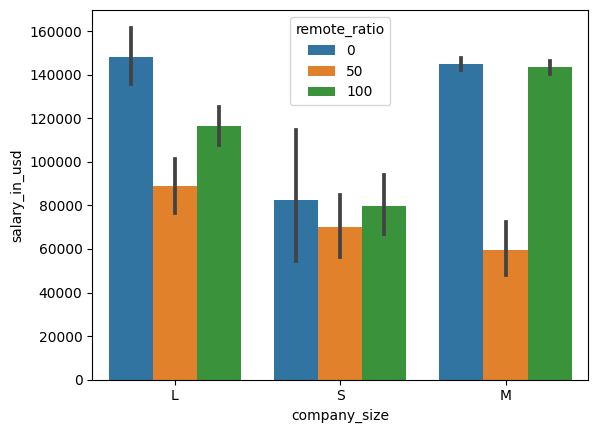

In [ ]:
sns.barplot(x= df['company_size'], y = df['salary_in_usd'],hue = df['remote_ratio'] )

Here I compared work year, salary and remote ratio. I observed a steady increase in the salaries of 0% remote ratio employees over the years from  2020. Least paid employees every year are the ones with 50% remote work.

<Axes: xlabel='work_year', ylabel='salary_in_usd'>

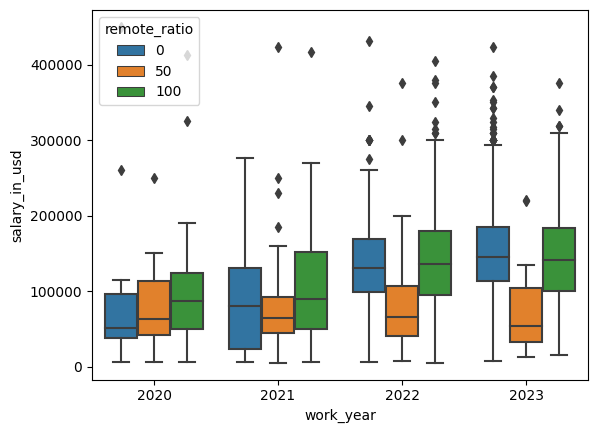

In [ ]:
sns.boxplot(x = df['work_year'], y = df['salary_in_usd'],hue = df['remote_ratio'] )

We can see that Data Engineer is the most popular job in this field. A lot of 
saturation is observed for the job roles of data engineers, data scientist and data analysts.

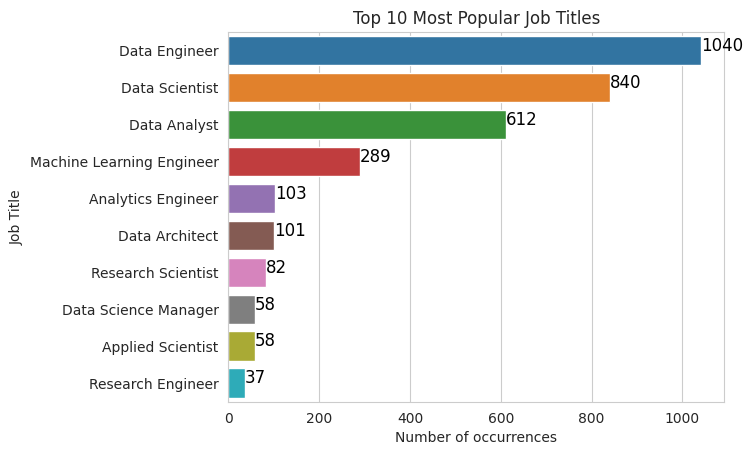

In [ ]:
job_title_count = df['job_title'].value_counts()
job_title_count = job_title_count[:10]
sns.set_style("whitegrid")
sns.barplot(x=job_title_count.values, y=job_title_count.index)
plt.title('Top 10 Most Popular Job Titles')
plt.xlabel('Number of occurrences')
plt.ylabel('Job Title')
for i, v in enumerate(job_title_count.values):
    plt.text(v, i, str(v), color='black', fontsize=12)

Finally, we compare salary distribution with the company size. The small companies' salary curve shows a right skew distribution which implies the mean is greater than the median. The mean overestimates the most common values in a positively skewed distribution. The medium sized companies' salary curve hits peak at 138k and a normal distribution is observed. Large companies salary curve also shows a steep right skew curve. All the companies intersect at one point around 97k.

In [ ]:
import plotly.figure_factory as ff
fig1 = ff.create_distplot([df[df['company_size'] == c]['salary_in_usd'] for c in df['company_size'].unique()], group_labels=df['company_size'].unique(), show_hist=False)
fig1.update_layout(title='Salary Distribution by Company Size', xaxis_title='Salary in USD')
fig1.show()

Density wise smaller companies' salary are dense between 0 to 130 thousand whereas middle sized companies' salary are more dense from 50 thousand to 300 thousand. Meanwhile large company salaries range from 0 to 250 thousand.